In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pca import PCA
from sklearn.decomposition import PCA as sklearnPCA

In [10]:
# Paramètres de la matrice
n = 100  # Nombre d'individus
p = 5    # Nombre de variables

# Création d'une matrice aléatoire
np.random.seed(0)  # Pour la reproductibilité
X = np.random.randn(n, p)

# Conversion en DataFrame pour une meilleure manipulation
df = pd.DataFrame(X, columns=[f'Variable {i+1}' for i in range(p)])


Visualisation des premières lignes de la matrice X :
   Variable 1  Variable 2  Variable 3  Variable 4  Variable 5
0    1.764052    0.400157    0.978738    2.240893    1.867558
1   -0.977278    0.950088   -0.151357   -0.103219    0.410599
2    0.144044    1.454274    0.761038    0.121675    0.443863
3    0.333674    1.494079   -0.205158    0.313068   -0.854096
4   -2.552990    0.653619    0.864436   -0.742165    2.269755

Indicateurs statistiques pour chaque variable :
       Variable 1  Variable 2  Variable 3  Variable 4  Variable 5
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean    -0.102957   -0.016874   -0.058413   -0.094274    0.145745
std      1.013613    0.961449    1.006064    1.039578    0.972417
min     -2.655619   -2.772593   -2.739677   -2.288620   -2.659172
25%     -0.730076   -0.805805   -0.690175   -0.752281   -0.398115
50%     -0.124405    0.007135   -0.117134   -0.220185    0.054055
75%      0.677724    0.803853    0.768311    0.505741    0.64669

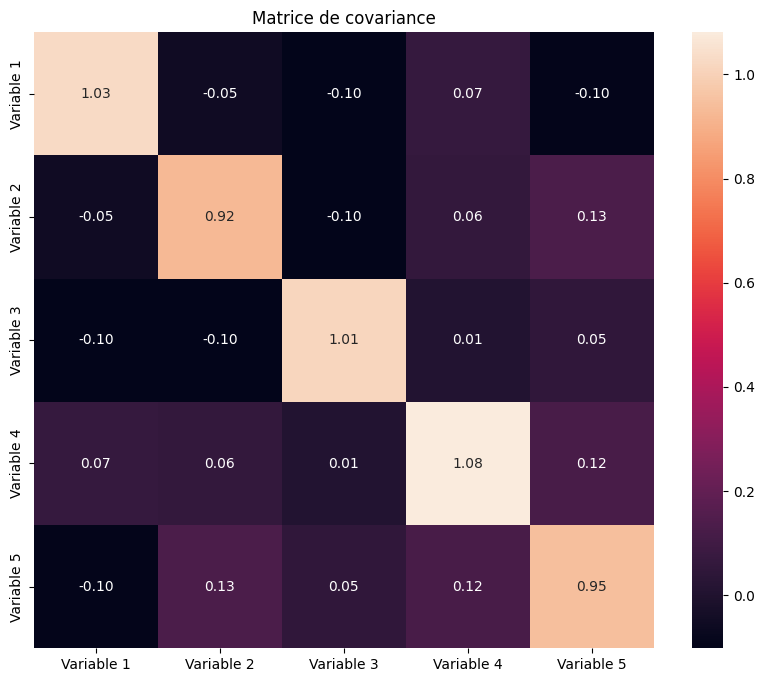

In [11]:
# Visualisation de la matrice
print("Visualisation des premières lignes de la matrice X :")
print(df.head())

# Calcul et affichage des indicateurs statistiques
print("\nIndicateurs statistiques pour chaque variable :")
print(df.describe())

# Calcul de la variance pour chaque variable
variance = df.var()
print("\nVariance pour chaque variable :")
print(variance)

# Calcul de l'écart-type pour chaque variable
ecart_type = df.std()
print("\nÉcart-type pour chaque variable :")
print(ecart_type)

# Calcul de la matrice de covariance
covariance = df.cov()
print("\nMatrice de covariance :")
print(covariance)

# Affichage de la matrice de covariance sous forme graphique
plt.figure(figsize=(10, 8))
sns.heatmap(covariance, annot=True, fmt=".2f")
plt.title("Matrice de covariance")
plt.show()



In [12]:
# Calcul de la moyenne pour chaque variable (colonne)
mean_X = np.mean(X, axis=0)

# Centrage des données
X_centered = X - mean_X

# Applying PCA to the dataset
pca = PCA()
pca.fit(X_centered)

# Extracting eigenvalues and eigenvectors
eigenvalues_centered = pca.eigenvalues
eigenvectors = pca.eigenvectors

eigenvalues_centered, eigenvectors


(array([1.19890095, 1.14790963, 1.03619762, 0.81046296, 0.74690192]),
 array([[ 0.24466321, -0.6922949 ,  0.3108332 , -0.60200122, -0.04295265],
        [-0.41943705, -0.11978841, -0.52219593, -0.25327285, -0.68766822],
        [-0.08097075,  0.57554894,  0.62150877, -0.34565713, -0.39551885],
        [-0.63040665, -0.39485936,  0.48404277,  0.4536074 , -0.08134173],
        [-0.60020303,  0.138593  , -0.10061602, -0.49820565,  0.60184371]]))

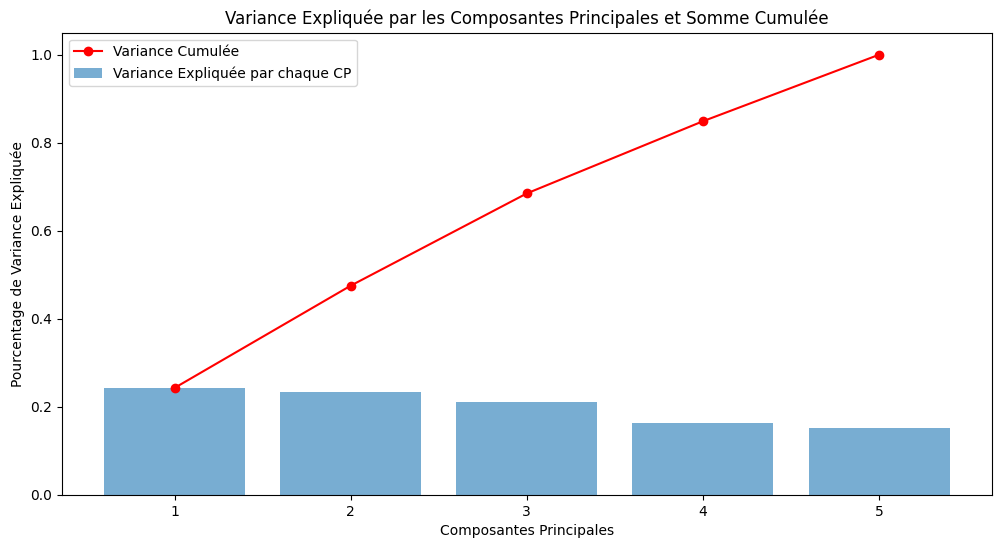

In [13]:
# Calcul de la part de la variance expliquée par chaque composante principale
variance_explained = eigenvalues_centered / eigenvalues_centered.sum()
cumulative_variance = np.cumsum(variance_explained)

# Création des indices pour les composantes principales
components = np.arange(1, p + 1)

# Création du graphique
plt.figure(figsize=(12, 6))

# Barres pour la variance expliquée par chaque composante
plt.bar(components, variance_explained, alpha=0.6, label='Variance Expliquée par chaque CP')

# Ligne pour la variance cumulée
plt.plot(components, cumulative_variance, marker='o', color='red', label='Variance Cumulée')

# Ajout de détails au graphique
plt.xlabel('Composantes Principales')
plt.ylabel('Pourcentage de Variance Expliquée')
plt.title('Variance Expliquée par les Composantes Principales et Somme Cumulée')
plt.xticks(components)
plt.legend(loc='best')

# Affichage du graphique
plt.show()


In [14]:
# Application des différentes méthodes pour déterminer le nombre de composantes à retenir

# Règle de Kaiser (Valeurs propres > 1)
kaiser_rule = np.sum(eigenvalues_centered > 1)

# Pourcentage de variance expliquée (80%, 90%, 95%)
thresholds = [0.8, 0.9, 0.95]
components_for_variance = [np.argmax(cumulative_variance >= t) + 1 for t in thresholds]

# Test de Jolliffe (Valeurs propres > 0.7)
jolliffe_rule = np.sum(eigenvalues_centered > 0.7)

# Analyse parallèle (Comparer avec valeurs propres de données aléatoires)
# Génération de données aléatoires et application de la PCA
random_data = np.random.randn(n, p)
pca.fit(random_data)
random_eigenvalues = pca.eigenvalues

# Comparaison des valeurs propres avec celles des données aléatoires
parallel_analysis = np.sum(eigenvalues_centered > random_eigenvalues)

kaiser_rule, components_for_variance, jolliffe_rule, parallel_analysis




(3, [4, 5, 5], 5, 3)

Règle de Kaiser : 3 composantes sont retenues (valeurs propres > 1).

Pourcentage de Variance Expliquée :

Pour atteindre 80% de la variance cumulée, 4 composantes sont nécessaires.
Pour atteindre 90% de la variance cumulée, 5 composantes sont nécessaires.
Pour atteindre 95% de la variance cumulée, 5 composantes sont également nécessaires.
Test de Jolliffe : 5 composantes sont retenues (valeurs propres > 0.7).

Analyse Parallèle : Comparaison avec les valeurs propres de données aléatoires suggère de retenir 3 composantes.

On décide donc de selctionner 3 composantes seulement.

In [15]:
# Sélection des 3 premiers vecteurs propres pour la transformation des données
eigenvectors_selected = eigenvectors[:, :3]

# Transformation des données centrées
X_pca = X_centered @ eigenvectors_selected

# Somme des carrés dans l'espace de données original
sum_squares_original = np.sum(X_centered**2, axis=1)

# Calcul de Qi,k pour chaque individu avec la PCA personnalisée
sum_squares_pca_custom = np.sum(X_pca**2, axis=1)
Qi_k_custom = sum_squares_pca_custom / sum_squares_original

# Affichage des premières valeurs de Qi,k pour vérification
Qi_k_custom[:10]  # Affichage des 10 premières valeurs de Qi,k pour un aperçu

array([0.85345327, 0.87805316, 0.29613795, 0.26797499, 0.95862317,
       0.77889506, 0.92695801, 0.0651625 , 0.14074721, 0.94219061])

In [16]:
# Calcul de gamma_ij pour chaque individu et chaque composante principale
gamma_ij = np.square(X_pca) / (n * eigenvalues_centered[:3])

# Affichage des premières valeurs de gamma_ij pour un aperçu (pour les 3 premières composantes et les 10 premiers individus)
gamma_ij[:10, :3]  # Affichage des contributions pour les 10 premiers individus sur les 3 premières composantes

array([[4.44177946e-02, 1.77886320e-02, 3.72343412e-02],
       [4.88511523e-03, 1.97548987e-03, 7.22848320e-03],
       [7.33939000e-03, 5.63939085e-05, 1.11779879e-04],
       [2.45966798e-04, 6.55051666e-03, 1.92593451e-03],
       [2.76829625e-02, 6.33737637e-02, 1.09550285e-02],
       [3.91547610e-02, 1.35881999e-03, 1.42665212e-04],
       [1.75400985e-02, 6.21848144e-06, 2.18610839e-02],
       [9.74509708e-05, 1.76685633e-03, 1.30219975e-04],
       [1.36971768e-03, 9.13556583e-03, 2.13610219e-03],
       [1.98293005e-02, 1.73563406e-02, 1.25946265e-03]])

In [19]:
# Application de la PCA de sklearn sur les données centrées
sklearn_pca = sklearnPCA(n_components=2)  # Focalisation sur les 2 premières composantes
sklearn_pca.fit(X_centered)

# Extraction des valeurs propres et des vecteurs propres de sklearn PCA
sklearn_eigenvalues = sklearn_pca.explained_variance_
sklearn_eigenvectors = sklearn_pca.components_

# Comparaison des résultats
# Valeurs propres (variance expliquée)
eigenvalues_comparison = np.column_stack((eigenvalues_centered[:2], sklearn_eigenvalues))

# Vecteurs propres (directions des axes)
# Normalisation des vecteurs propres pour la comparaison
eigenvectors_normalized = eigenvectors[:, :2] / np.linalg.norm(eigenvectors[:, :2], axis=0)
sklearn_eigenvectors_normalized = sklearn_eigenvectors / np.linalg.norm(sklearn_eigenvectors, axis=1)[:, np.newaxis]

eigenvectors_comparison = np.column_stack((eigenvectors_normalized.flatten(), sklearn_eigenvectors_normalized.flatten()))

eigenvalues_comparison, eigenvectors_comparison

(array([[1.19890095, 1.21101106],
        [1.14790963, 1.15950468]]),
 array([[ 0.24466321,  0.24466321],
        [-0.6922949 , -0.41943705],
        [-0.41943705, -0.08097075],
        [-0.11978841, -0.63040665],
        [-0.08097075, -0.60020303],
        [ 0.57554894,  0.6922949 ],
        [-0.63040665,  0.11978841],
        [-0.39485936, -0.57554894],
        [-0.60020303,  0.39485936],
        [ 0.138593  , -0.138593  ]]))

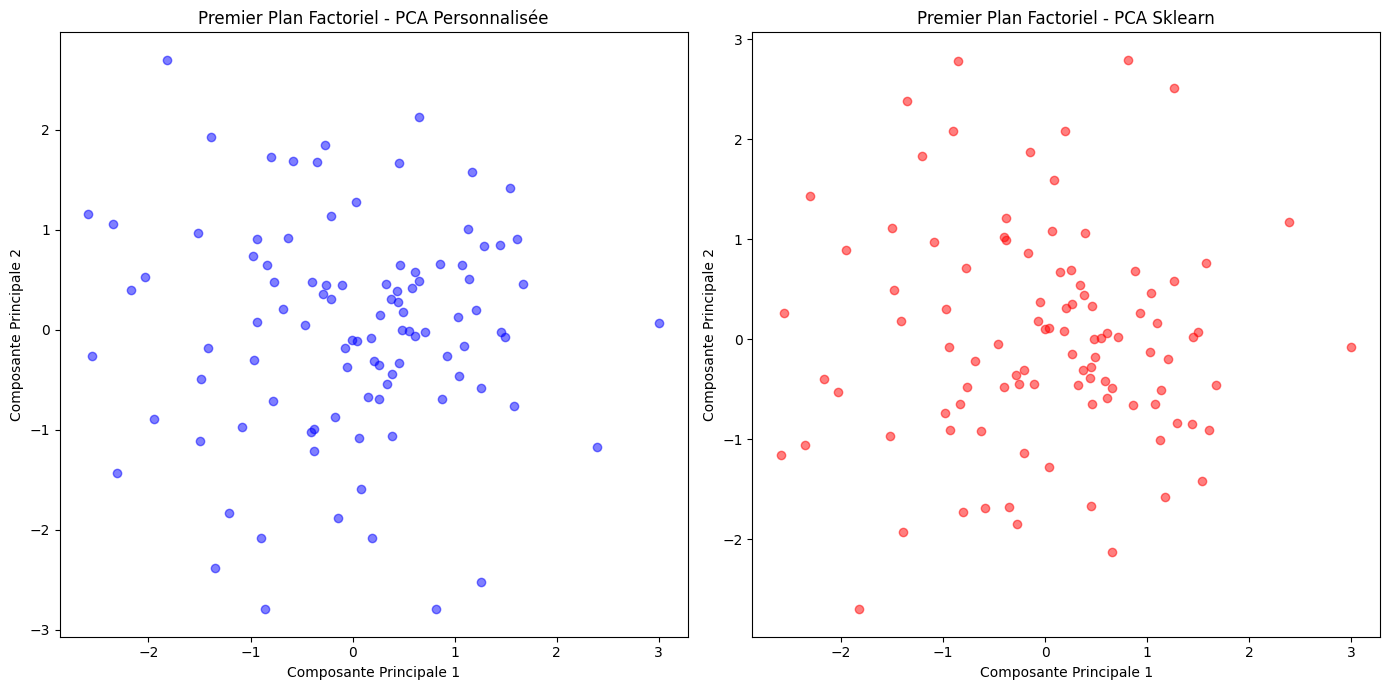

In [20]:
# Création des plots pour comparer les deux premières composantes principales des deux implémentations de PCA

# Transformation des données centrées avec les deux implémentations de PCA
X_pca_custom = X_centered @ eigenvectors[:, :2]
X_pca_sklearn = sklearn_pca.transform(X_centered)

# Création du graphique
plt.figure(figsize=(14, 7))

# Premier plan factoriel avec PCA personnalisée
plt.subplot(1, 2, 1)
plt.scatter(X_pca_custom[:, 0], X_pca_custom[:, 1], color='blue', alpha=0.5)
plt.title('Premier Plan Factoriel - PCA Personnalisée')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')

# Premier plan factoriel avec PCA sklearn
plt.subplot(1, 2, 2)
plt.scatter(X_pca_sklearn[:, 0], X_pca_sklearn[:, 1], color='red', alpha=0.5)
plt.title('Premier Plan Factoriel - PCA Sklearn')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')

plt.tight_layout()
plt.show()


On observe qu'a une roation de pi/deux prêt on a le meme graph


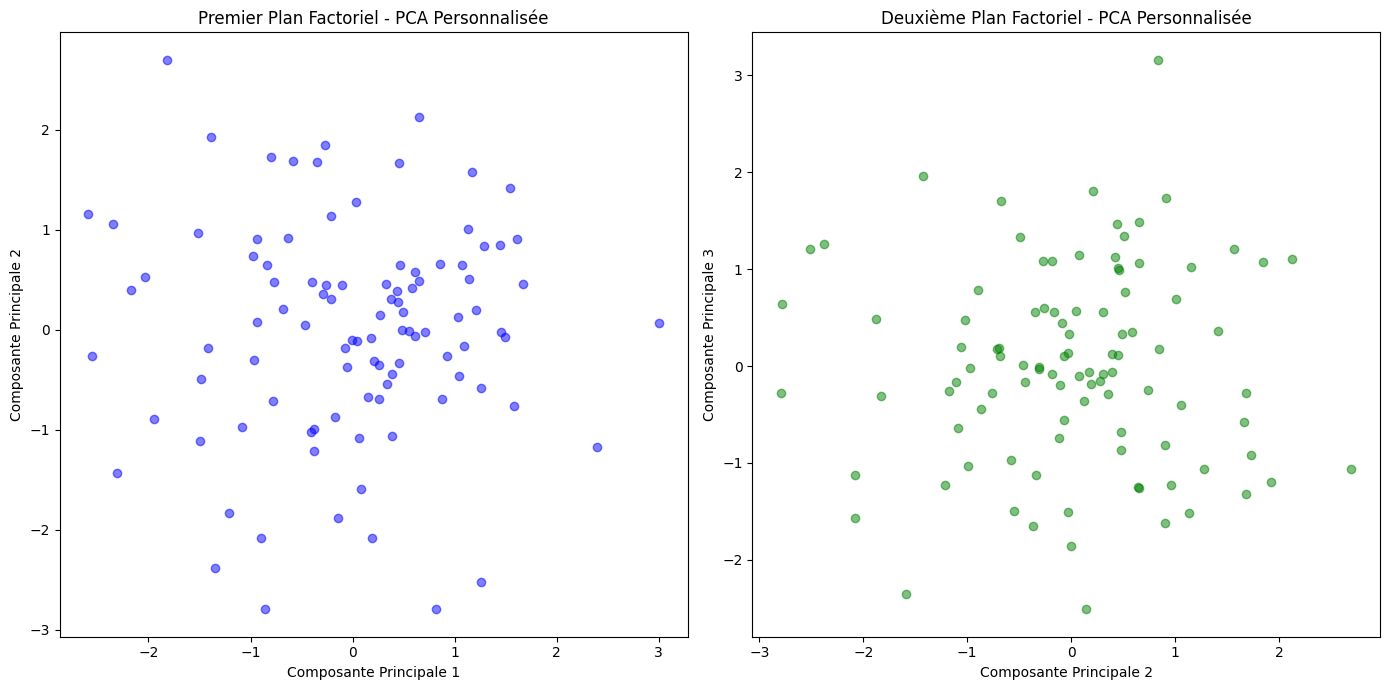

In [21]:
# Création de graphiques pour représenter les individus dans les sous-espaces formés par les premières et deuxièmes composantes principales (uniquement pour la PCA personnalisée)

# Premier plan factoriel (1ère et 2ème composantes)
plt.figure(figsize=(14, 7))

# Premier plan factoriel
plt.subplot(1, 2, 1)
plt.scatter(X_pca_custom[:, 0], X_pca_custom[:, 1], color='blue', alpha=0.5)
plt.title('Premier Plan Factoriel - PCA Personnalisée')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')

# Deuxième plan factoriel (2ème et 3ème composantes)
# Calcul des coordonnées pour la 3ème composante
X_pca_custom_3rd = X_centered @ eigenvectors[:, 2]

plt.subplot(1, 2, 2)
plt.scatter(X_pca_custom[:, 1], X_pca_custom_3rd, color='green', alpha=0.5)
plt.title('Deuxième Plan Factoriel - PCA Personnalisée')
plt.xlabel('Composante Principale 2')
plt.ylabel('Composante Principale 3')

plt.tight_layout()
plt.show()
